#**Feature Selection.**

#**Section 1: Filter-Based Methods**

#*Section 1.1: Filter-Based Methods - Implementation with Scikit Learn*

#  Implementation - Classification Tasks

** Implementation 1: Select k Best with chi score**

In [5]:
# Necessary Imports and Loading Datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [6]:
# Create an instance of SelectKBest with chi2 scoring and specify k
k_best = SelectKBest(score_func=chi2, k=5)  # You can adjust the value of 'k' as needed

# Fit SelectKBest on the dataset
k_best.fit(X, y)

# Get the indices of the selected features
selected_feature_indices = np.where(k_best.get_support())[0]
# Create a bar chart to visualiz e feature scores
feature_scores =k_best.scores_
feature_names = data.feature_names
sorted_indices = np.argsort(feature_scores)[::-1]
sorted_feature_scores = feature_scores[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

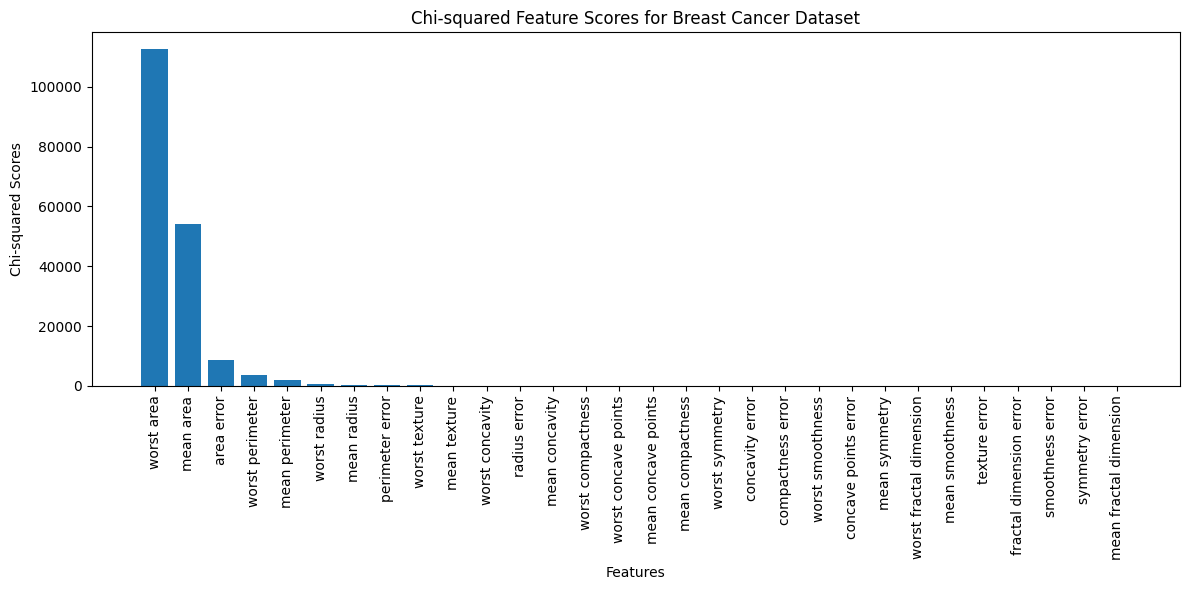

In [7]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_feature_scores)), sorted_feature_scores, tick_label=sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Chi-squared Scores')
plt.title('Chi-squared Feature Scores for Breast Cancer Dataset')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
# Create a dataframe to store feature names and chi-squared values
feature_df = pd.DataFrame({'Feature': feature_names, 'Chi-Squared Value': feature_scores})

# Sort the dataframe by chi-squared values in descending order
feature_df = feature_df.sort_values(by='Chi-Squared Value', ascending=False)

# Print the dataframe
print(feature_df)

                    Feature  Chi-Squared Value
23               worst area      112598.431564
3                 mean area       53991.655924
13               area error        8758.504705
22          worst perimeter        3665.035416
2            mean perimeter        2011.102864
20             worst radius         491.689157
0               mean radius         266.104917
12          perimeter error         250.571896
21            worst texture         174.449400
1              mean texture          93.897508
26          worst concavity          39.516915
10             radius error          34.675247
6            mean concavity          19.712354
25        worst compactness          19.314922
27     worst concave points          13.485419
7       mean concave points          10.544035
5          mean compactness           5.403075
28           worst symmetry           1.298861
16          concavity error           1.044718
15        compactness error           0.613785
24         wo

**Implementation 2: Select k Best with mutual info classifier**

In [9]:
# Necessary Imports and Data Loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [10]:
# Create an instance of SelectKBest with mutual information scoring and specify k
k_best = SelectKBest(score_func=mutual_info_classif, k=5)  # You can adjust the value of 'k' as needed

# Fit SelectKBest on the dataset
k_best.fit(X, y)

# Get the indices of the selected features
selected_feature_indices = np.where(k_best.get_support())[0]

# Get the feature names and mutual information scores
feature_names = data.feature_names
feature_scores = k_best.scores_

# Create a dataframe to store feature names and mutual information scores
feature_df = pd.DataFrame({'Feature': feature_names, 'Mutual Information': feature_scores})

# Sort the dataframe by mutual information scores in descending order
feature_df = feature_df.sort_values(by='Mutual Information', ascending=False)

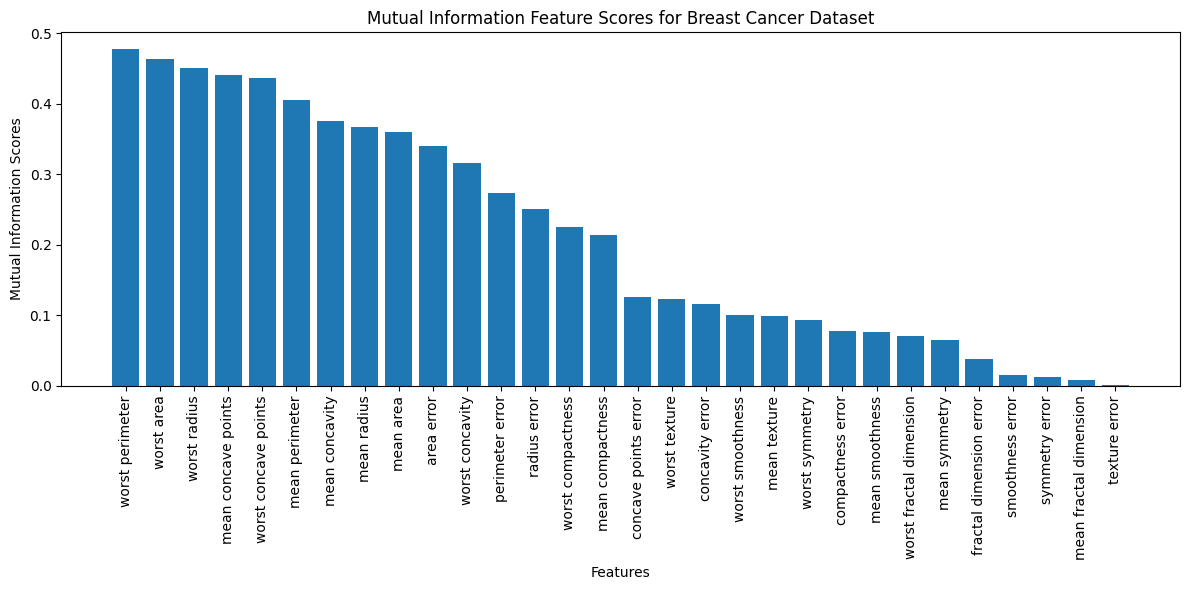

In [11]:
# Create a bar chart to visualize feature scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_df)), feature_df['Mutual Information'])
plt.xlabel('Features')
plt.ylabel('Mutual Information Scores')
plt.title('Mutual Information Feature Scores for Breast Cancer Dataset')
plt.xticks(range(len(feature_df)), feature_df['Feature'], rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

#  Implementation - Regression Tasks

** Implementation 1: Select k Best with r_regression**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes # Changed to load_diabetes
from sklearn.feature_selection import SelectKBest, r_regression

# Load the Diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

In [15]:
# Create an instance of SelectKBest with f_regression scoring and specify k
k_best = SelectKBest(score_func=r_regression, k=5)  # You can adjust the value of 'k' as needed

# Fit SelectKBest on the dataset
k_best.fit(X, y)

# Get the indices of the selected features
selected_feature_indices = np.where(k_best.get_support())[0]

# Get the feature names and F-statistic scores
feature_names = data.feature_names
feature_scores = k_best.scores_

# Create a dataframe to store feature names and F-statistic scores
feature_df = pd.DataFrame({'Feature': feature_names, 'R-Statistic': feature_scores})

# Sort the dataframe by F-statistic scores in descending order
feature_df = feature_df.sort_values(by='R-Statistic', ascending=False)


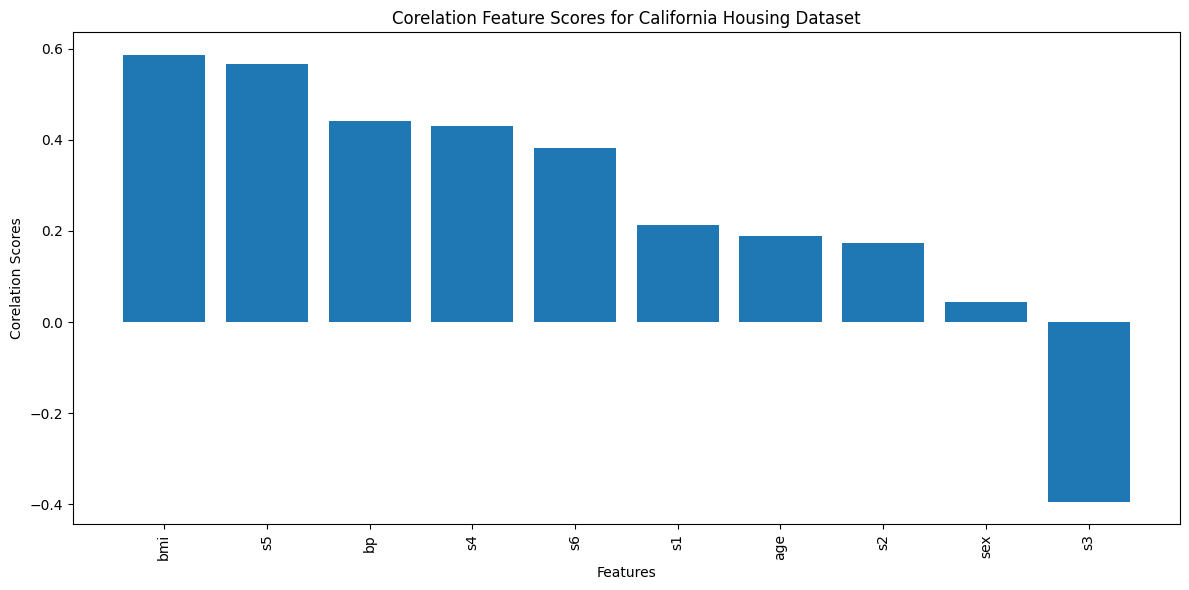

In [16]:
# Create a bar chart to visualize feature scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_df)), feature_df['R-Statistic'])
plt.xlabel('Features')
plt.ylabel('Corelation Scores')
plt.title('Corelation Feature Scores for California Housing Dataset')
plt.xticks(range(len(feature_df)), feature_df['Feature'], rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

# Implementation - Select Percentile

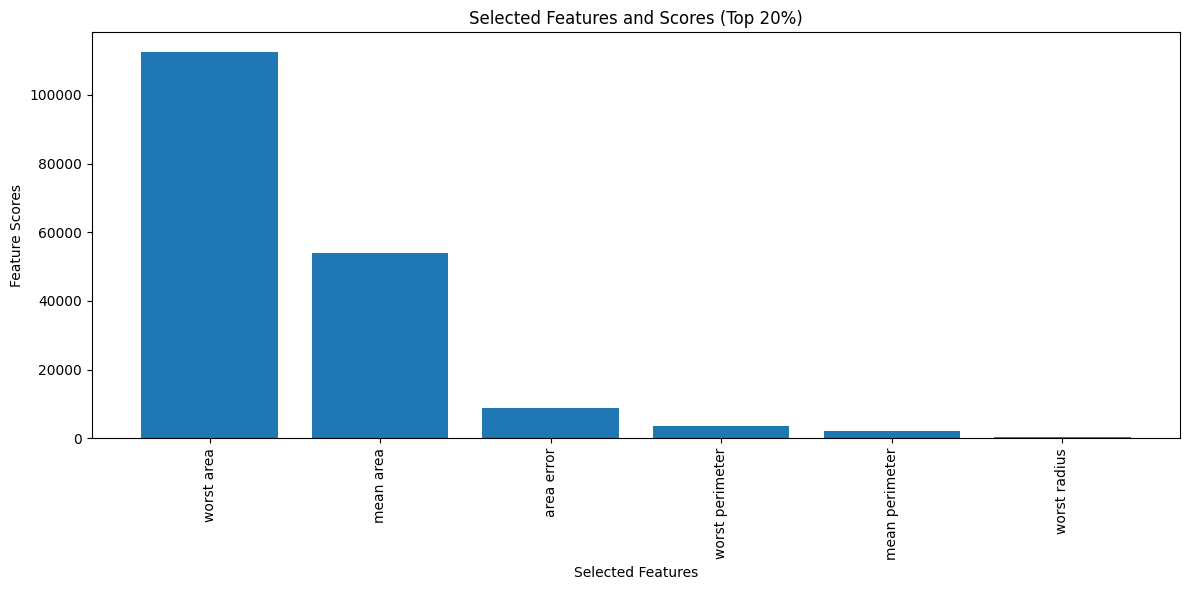

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, chi2

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create an instance of SelectPercentile with a scoring function (e.g., chi-squared)
percentile = 20  # You can adjust the percentile as needed
select_percentile = SelectPercentile(score_func=chi2, percentile=percentile)

# Fit SelectPercentile on the dataset
select_percentile.fit(X, y)

# Get the selected feature indices and scores
selected_feature_indices = select_percentile.get_support(indices=True)
feature_scores = select_percentile.scores_

# Get the feature names
feature_names = data.feature_names

# Create a dataframe to store selected feature names and scores
selected_feature_df = pd.DataFrame({'Feature': [feature_names[i] for i in selected_feature_indices], 'Score': feature_scores[selected_feature_indices]})

# Sort the dataframe by scores in descending order
selected_feature_df = selected_feature_df.sort_values(by='Score', ascending=False)

# Create a bar chart to visualize selected feature scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(selected_feature_df)), selected_feature_df['Score'])
plt.xlabel('Selected Features')
plt.ylabel('Feature Scores')
plt.title(f'Selected Features and Scores (Top {percentile}%)')
plt.xticks(range(len(selected_feature_df)), selected_feature_df['Feature'], rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

#**Section 2: Wrapper Methods**

#*Implementation - Recursive Feature Elimination*

In [18]:
# Necessary Imports and Data Loading.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier as the estimator
estimator = RandomForestClassifier(random_state=42)

# Create an instance of RFE with the estimator and specify the number of features to select
num_features_to_select = 10  # You can adjust the number of features as needed
rfe = RFE(estimator, n_features_to_select=num_features_to_select)

# Fit RFE on the training dataset
rfe.fit(X_train, y_train)

# Get feature ranking and support
feature_ranking = rfe.ranking_
feature_support = rfe.support_

# Get feature names
feature_names = data.feature_names

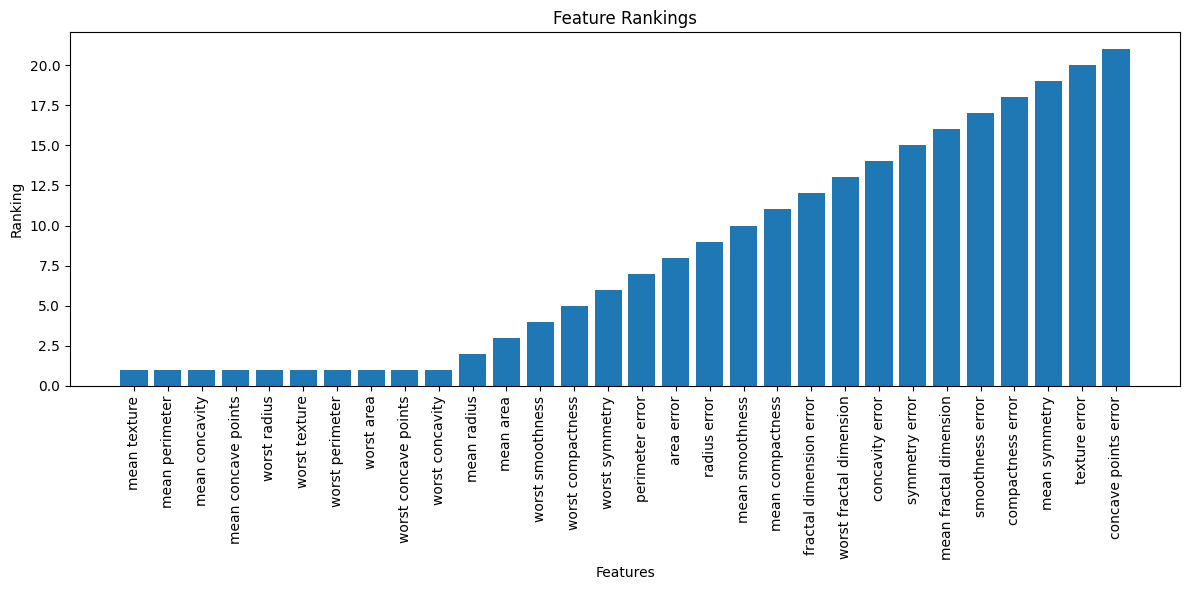

In [20]:
# Create a dataframe to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Ranking': feature_ranking, 'Support': feature_support})

# Sort the dataframe by ranking in ascending order
feature_importance_df = feature_importance_df.sort_values(by='Ranking')

# Create a bar chart to visualize feature rankings
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance_df)), feature_importance_df['Ranking'])
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Feature Rankings')
plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

#*Implementation - Sequential Forward and Backward.*

In [21]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier as the estimator
estimator = RandomForestClassifier(random_state=42)

# Create an instance of SequentialFeatureSelector for forward selection
# You can also use "direction='backward'" for backward selection
sfs = SequentialFeatureSelector(estimator, n_features_to_select=5, direction="forward", scoring='accuracy', cv=5)

# Fit the SequentialFeatureSelector on the training dataset
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = sfs.get_support(indices=True)

In [23]:
# Transform the training and testing datasets to select the top features
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

# Train a classifier (e.g., RandomForest) on the selected features
clf_selected = RandomForestClassifier(random_state=42)
clf_selected.fit(X_train_selected, y_train)

# Make predictions on the testing set using selected features
y_pred_selected = clf_selected.predict(X_test_selected)

# Calculate accuracy on the testing set using selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy on the testing set using selected features:", accuracy_selected)

Accuracy on the testing set using selected features: 0.956140350877193


#*Experimentation - Sequential Forward Vs. Backward Selection.*

This experiment compares the time efficiency of forward vs. backward sequential feature selection methods for identifying top features in the

In [24]:
from sklearn.feature_selection import SequentialFeatureSelector
from time import time
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Get feature names from the dataset
feature_names = data.feature_names

# Measure the time taken for forward selection
tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    Ridge(), n_features_to_select=2, direction="forward"
).fit(X, y)
toc_fwd = time()

# Measure the time taken for backward selection
tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    Ridge(), n_features_to_select=2, direction="backward"
).fit(X, y)
toc_bwd = time()

# Get the selected feature indices
selected_feature_indices_fwd = np.where(sfs_forward.get_support())[0]
selected_feature_indices_bwd = np.where(sfs_backward.get_support())[0]

# Display the selected feature names and the time taken
selected_feature_names_fwd = feature_names[selected_feature_indices_fwd]
selected_feature_names_bwd = feature_names[selected_feature_indices_bwd]

print(
    "Features selected by forward sequential selection: "
    f"{selected_feature_names_fwd}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print(
    "Features selected by backward sequential selection: "
    f"{selected_feature_names_bwd}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by forward sequential selection: ['worst perimeter' 'worst concavity']
Done in 1.135s
Features selected by backward sequential selection: ['worst radius' 'worst concavity']
Done in 5.963s


#**Section 3: Embedded Methods**

**1. Lasso Regularization (L1 Penalty)**

In [27]:
from sklearn.datasets import load_diabetes # Changed from fetch_california_housing
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Load dataset
data = load_diabetes() # Changed from fetch_california_housing
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Lasso regression with feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
# Identify selected features
selected_features = lasso.coef_ != 0
print("Selected features:", selected_features)
print("Feature importance (coefficients):",  lasso.coef_)

Selected features: [ True  True  True  True  True  True  True  True  True  True]
Feature importance (coefficients): [  1.77488909 -11.3142662   26.01708504  16.36008376 -29.26499921
  13.27874457   0.55144235  10.19882687  29.51285073   2.35873969]


**Tree-Based Models (e.g., Random Forest)**

In [28]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Load dataset
X, y = load_iris(return_X_y=True)
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Feature importance
importances = rf.feature_importances_
print("Feature importance scores:", importances)
# Select important features
threshold = 0.1 # Threshold for feature importance
selected_features = importances > threshold
print("Selected features:", selected_features)

Feature importance scores: [0.10809762 0.03038681 0.43999397 0.42152159]
Selected features: [ True False  True  True]
